In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [5]:
#live = pd.read_csv('Live.csv')

live = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment4/Live.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
live.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [7]:
live.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [8]:
live = live.drop(['status_id','status_published'],axis=1)

In [9]:
live['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

In [10]:
live

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [11]:
X = live.drop(['status_type'],axis = 1)
y = live[['status_type']]

le = preprocessing.LabelEncoder()
sc = StandardScaler()
#X = sc.fit_transform(X)


y = le.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,stratify=y)

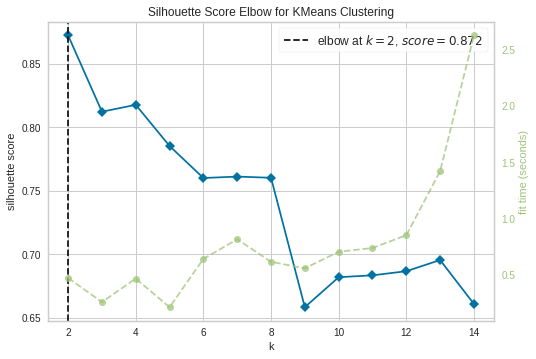

In [12]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state=0)

visualizer = KElbowVisualizer(km, k=(2,15), metric = 'silhouette')

visualizer.fit(X)

visualizer.show()
plt.show()

In [13]:
km = KMeans(n_clusters = 2,random_state=0)

y_pred = km.fit_predict(X)


live['cluster']=y_pred

In [14]:
km.cluster_centers_

array([[2.24142278e+02, 1.22109857e+02, 3.08061948e+01, 2.11227529e+02,
        1.09083804e+01, 1.15298886e+00, 5.56809958e-01, 1.97423650e-01,
        9.63960052e-02],
       [5.22886525e+02, 5.23441844e+03, 4.91624113e+02, 4.02007092e+02,
        1.01921986e+02, 7.97163121e+00, 7.53900709e+00, 2.51063830e+00,
        9.36170213e-01]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


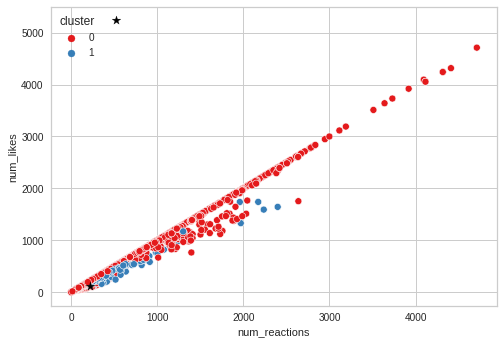

In [15]:
sns.scatterplot('num_reactions','num_likes',data=live, 
               hue=live['cluster'], 
               palette='Set1',legend='full')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], 
           marker='*',s=80,c='black')

In [16]:
y = y.reshape(-1,1)
from sklearn import metrics 

silhouette_avg = metrics.silhouette_score(y,y_pred)

print('The silhouette coefficient is:  ',silhouette_avg)

The silhouette coefficient is:   0.11245677993353945


# DBSCAN

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
cluster = DBSCAN(eps=3,min_samples=4).fit(X)

In [19]:
set(cluster.labels_)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


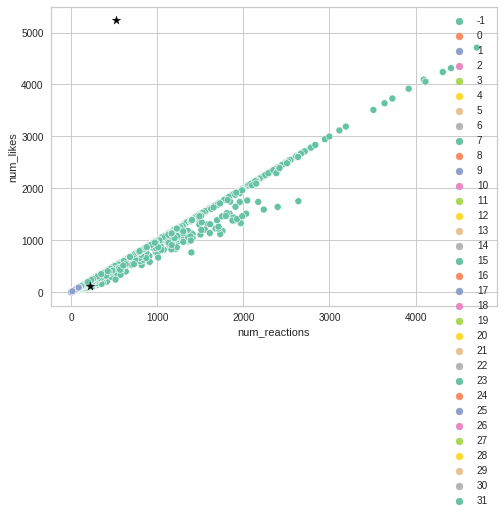

In [21]:
tt = sns.scatterplot('num_reactions','num_likes',data=X,
                    hue=cluster.labels_,palette='Set2',
                     legend='full')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], 
           marker='*',s=80,c='black')